Auteur : Antoine Chesnais  
Date dernière version : 29/10/2019  
Description : Ce notebook contient la analyse de la stabilité de la segmentation du dataset customer / orders   
Librairies utilisées : Pandas, Numpy, scipy, Matplolib, Seaborn, sklearn

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Sélection-des-features" data-toc-modified-id="Sélection-des-features-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Sélection des features</a></span></li><li><span><a href="#Transformation-log" data-toc-modified-id="Transformation-log-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Transformation log</a></span></li><li><span><a href="#Scaling-des-données" data-toc-modified-id="Scaling-des-données-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Scaling des données</a></span></li></ul></li><li><span><a href="#Segmentation-2017" data-toc-modified-id="Segmentation-2017-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Segmentation 2017</a></span></li><li><span><a href="#Segmentation-2018" data-toc-modified-id="Segmentation-2018-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Segmentation 2018</a></span></li><li><span><a href="#Comparaison-2017-/-2018" data-toc-modified-id="Comparaison-2017-/-2018-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Comparaison 2017 / 2018</a></span><ul class="toc-item"><li><span><a href="#Alignement-automatique-des-segments" data-toc-modified-id="Alignement-automatique-des-segments-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Alignement automatique des segments</a></span></li><li><span><a href="#Comparaison-:" data-toc-modified-id="Comparaison-:-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Comparaison :</a></span></li></ul></li><li><span><a href="#Conclusion-:" data-toc-modified-id="Conclusion-:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion :</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import scipy
import functions_extended

L'objectif de ce Notebook est d'appliquer la segmentation réalisée sur le dataset customers/orders séparément sur les données de l'année 2017 et 2018. On étudiera ensuite si la définition de la structure de la segmentation change entre ces deux années.

# Data

On charge les données customers / orders de 2017 et 2018 en deux sets distincts.

In [2]:
data_2017 = pd.read_csv('BDD_customers_orders_2017.csv')
data_2018 = pd.read_csv('BDD_customers_orders_2018.csv')
data_2017.set_index(keys='customer_unique_id', drop=True, inplace=True)
data_2018.set_index(keys='customer_unique_id', drop=True, inplace=True)
display(data_2017)

,order_count,days_since_last_order,review_score,order_value,payment_installments
customer_unique_id,,,,,
0000f46a3911fa3c0805444483337064,1,296,3.0,86.22,8.0
0000f6ccb0745a6a4b88665a16c9f078,1,80,4.0,43.62,4.0
0004aac84e0df4da2b147fca70cf8255,1,47,5.0,196.89,6.0
0005e1862207bf6ccc02e4228effd9a0,1,302,4.0,150.12,3.0
0006fdc98a402fceb4eb0ee528f6a8d4,1,166,3.0,29.00,2.0
...,...,...,...,...,...
fffbf87b7a1a6fa8b03f081c5f51a201,1,4,5.0,167.32,2.0
fffcf5a5ff07b0908bd4e2dbc735a684,1,206,5.0,2067.42,10.0
fffea47cd6d3cc0a88bd621562a9d061,1,21,4.0,84.58,1.0


# Preprocessing

La partie pré-processing est la même que pour la segmentation originale.

## Sélection des features

In [3]:
data_RFM_RV_2017 = data_2017.loc[:,['order_count', 'days_since_last_order', 'order_value',
                                    'review_score']].copy()
data_RFM_RV_2018 = data_2018.loc[:,['order_count', 'days_since_last_order', 'order_value',
                                    'review_score']].copy()

In [4]:
RFM_RV_2017_pop_average = data_RFM_RV_2017.mean()
RFM_RV_2018_pop_average = data_RFM_RV_2018.mean()
display(RFM_RV_2017_pop_average)
display(RFM_RV_2018_pop_average)

order_count                1.031753
days_since_last_order    137.268090
order_value              165.848757
review_score               4.068887
dtype: float64

order_count                1.023643
days_since_last_order    124.763831
order_value              164.854079
review_score               4.075889
dtype: float64

## Transformation log

In [5]:
data_RFM_RV_2017_log = data_RFM_RV_2017.copy()
data_RFM_RV_2017_log['order_value'] = np.log(data_RFM_RV_2017['order_value'] + 0.001)
data_RFM_RV_2017_log['order_count'] = np.log(data_RFM_RV_2017['order_count'] + 0.001)

In [6]:
data_RFM_RV_2018_log = data_RFM_RV_2018.copy()
data_RFM_RV_2018_log['order_value'] = np.log(data_RFM_RV_2018['order_value'] + 0.001)
data_RFM_RV_2018_log['order_count'] = np.log(data_RFM_RV_2018['order_count'] + 0.001)

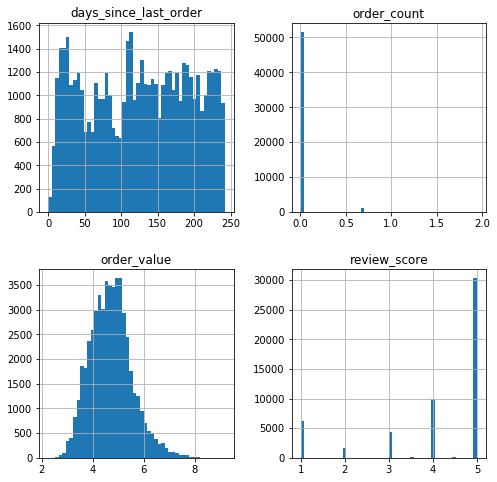

In [7]:
data_RFM_RV_2018_log.hist(figsize=(8,8), bins=50);

## Scaling des données

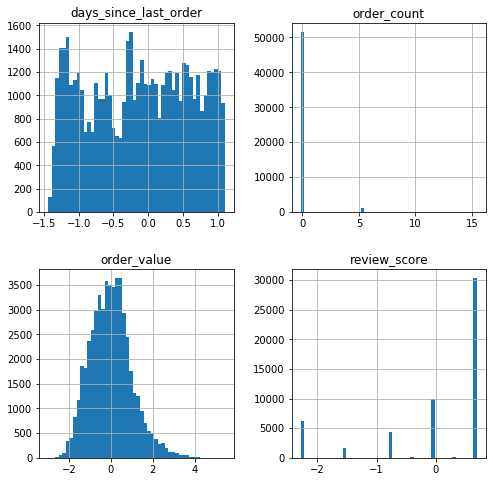

In [8]:
scaler_RV_2017 = StandardScaler().fit(data_RFM_RV_2017_log)
scaled_data_RFM_RV_2017 = pd.DataFrame(scaler_RV_2017.transform(data_RFM_RV_2017_log), 
                                  columns=data_RFM_RV_2017.columns, 
                                  index=data_RFM_RV_2017.index)

scaler_RV_2018 = StandardScaler().fit(data_RFM_RV_2018_log)
scaled_data_RFM_RV_2018 = pd.DataFrame(scaler_RV_2017.transform(data_RFM_RV_2018_log), 
                                  columns=data_RFM_RV_2018.columns, 
                                  index=data_RFM_RV_2018.index)

scaled_data_RFM_RV_2018.hist(figsize=(8,8), bins=50);

# Segmentation 2017

On applique ensuite la segmentation retenue (kmeans 5 cluster) aux données RFM + satisfaction de 2017 :

Moyennes par segment : 


,order_count,days_since_last_order,order_value,review_score
segment,,,,
0,1.00,103.93,346.94,4.60
1,1.00,72.14,73.48,4.59
2,2.11,124.36,309.10,4.11
3,1.00,249.53,109.83,4.55
4,1.00,129.79,178.04,1.33


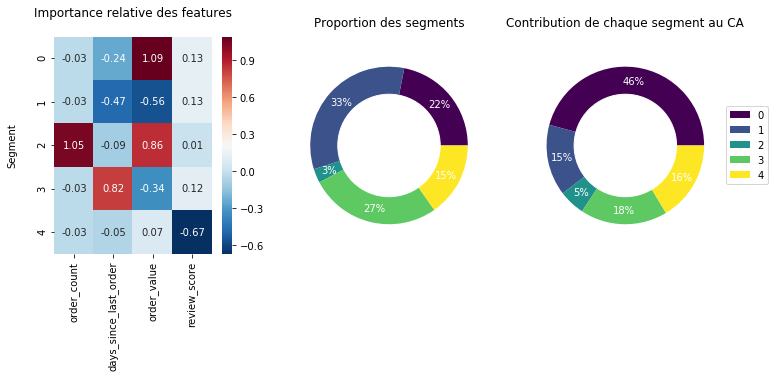

In [9]:
kmeans_2017, imp_2017, pop_2017, value_2017 = functions_extended.kmeans_analysis(5, data_RFM_RV_2017, 
                                                                        scaled_data_RFM_RV_2017, 'viridis')

# Segmentation 2018

Même étape que précédemment sur les données de 2018.

Moyennes par segment : 


,order_count,days_since_last_order,order_value,review_score
segment,,,,
0,1.00,55.96,86.24,4.66
1,1.00,142.44,179.23,1.43
2,1.00,127.44,326.24,4.63
3,1.00,181.65,70.85,4.58
4,2.08,115.15,321.73,4.06


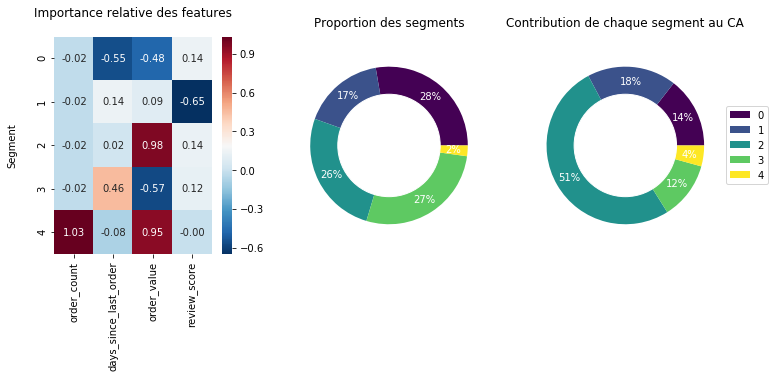

In [10]:
kmeans_2018, imp_2018, pop_2018, value_2018 = functions_extended.kmeans_analysis(5, data_RFM_RV_2018, 
                                                                        scaled_data_RFM_RV_2018, 'viridis')

# Comparaison 2017 / 2018

## Alignement automatique des segments

L'initialisation du Kmeans étant aléatoire, l'ordre des segments peut changer entre 2017 et 2018, même si les définitions de ceux ci sont similaires. On alignera ainsi les clusters entre les deux années en mettant en regard ceux dont la distance entre leurs centroïdes est la plus faible.

Alignement des segments de 2017 sur 2018 :

In [11]:
display(kmeans_2017.cluster_centers_)

array([[-0.16877508, -0.34730783,  1.0980089 ,  0.39207465],
       [-0.16877508, -0.68043872, -0.63643563,  0.38647572],
       [ 5.70516193, -0.13493664,  0.87530874,  0.03237652],
       [-0.16877508,  1.17421148, -0.26422392,  0.35772337],
       [-0.16877508, -0.07900916,  0.1019987 , -2.03546862]])

In [12]:
display(kmeans_2018.cluster_centers_)

array([[-0.16877508, -0.85038929, -0.4567033 ,  0.44108724],
       [-0.16877508,  0.05391314,  0.14930845, -1.95948863],
       [-0.16877508, -0.10054946,  1.05789609,  0.41682296],
       [-0.16877508,  0.46287123, -0.69521543,  0.38257685],
       [ 5.63156988, -0.23121851,  0.93207514, -0.00583833]])

In [13]:
new_2017_index = []
for center in kmeans_2017.cluster_centers_:
    mini = pd.DataFrame(kmeans_2018.cluster_centers_ - center)
    new_2017_index.append(abs(mini).sum(axis=1).idxmin())
display(new_2017_index)

[2, 0, 4, 3, 1]

In [14]:
imp_2017.index = new_2017_index
pop_2017.index = new_2017_index
value_2017.index = new_2017_index
display(pop_2017)

2    21.881363
0    32.999337
4     2.873287
3    26.989683
1    15.256331
Name: segment, dtype: float64

## Comparaison :

Dans un premier temps on regarde si la définition des segments, vis à vis des différentes features, a été modifiée :

Text(0.5, 1, '2018')

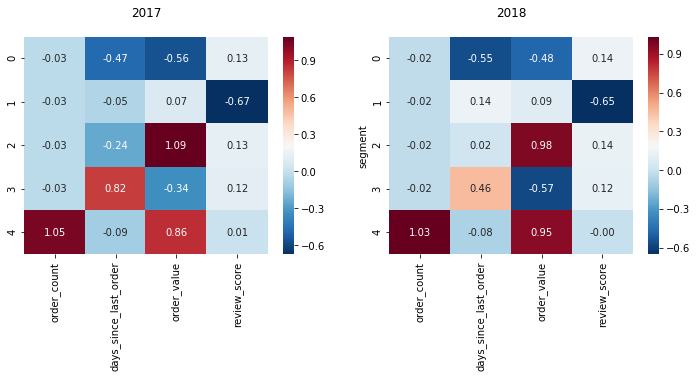

In [15]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
sns.heatmap(data=imp_2017.sort_index(), annot=True, fmt='.2f', cmap='RdBu_r', ax=axs[0])
axs[0].set_title('2017', pad=20)
sns.heatmap(data=imp_2018, annot=True, fmt='.2f', cmap='RdBu_r', ax=axs[1])
axs[1].set_title('2018', pad=20)

Au final la définition de la segmentation n'a pas évoluée entre 2017 et 2018 et celle ci reste valide. Les variations les plus importantes se situent au niveau du critère de récence de la dernière commande, mais cela est normal car les données de 2018 sont uniquement sur 8 mois et non 12. Pour compléter cela, on peut aller voir si la population au sein de chaque segment évolue, ainsi que la valeur générée par ceux ci.

Text(0.5, 0, '% of value generated')

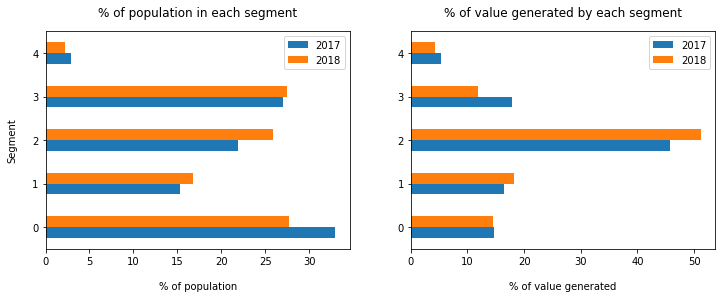

In [16]:
pop_comp = pd.DataFrame([pop_2017.sort_index(),pop_2018.sort_index()], index=[2017, 2018])
value_comp = pd.DataFrame([value_2017.sort_index(),value_2018.sort_index()], index=[2017, 2018])

fig, axs = plt.subplots(1,2, figsize=(12,4))
pop_comp.T.plot.barh(ax = axs[0])
value_comp.T.plot.barh(ax = axs[1])
axs[0].set_title('% of population in each segment', pad=15)
axs[0].set_ylabel('Segment', labelpad=15)
axs[0].set_xlabel('% of population', labelpad=15)
axs[1].set_title('% of value generated by each segment', pad=15)
axs[1].set_xlabel('% of value generated', labelpad=15)

Même constat pour la population et la valeur générée par segment. Les différences ne sont pas significatives et certaines variations sont potentiellement dues au nombre de mois sur lesquels les données sont établies.

# Conclusion :

Au final, la segmentation est stable dans le temps, il n'est donc pas nécessaire de la redéfinir très régulièrement. Néanmoins, celle ci contient un critère de récence du client et selon la définition de 'client récent' souhaitée, l'attribution des clients à un segment doit se faire régulièrement. Par exemple, si la segmentation est faite sur un an, un client 'récent' est un client qui en moyenne a commandé il y a 2 mois et demi.